# Crime Data Analysis

## Temporal Patterns
### To analyze crime patterns over time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load the data
crime_data = pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/crime_data_filtered.csv')
crime_data['Date'] = pd.to_datetime(crime_data['Date']).dt.floor('D')
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Location
0,13204489,JG416325,2023-09-06,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,123,1.0,4.0,32.0,06,1176857.0,1896680.0,"(41.871834768, -87.62615082)"
1,12342615,JE202211,2021-04-17,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,631,6.0,6.0,44.0,03,1179448.0,1851073.0,"(41.746626309, -87.618031954)"
2,12592454,JF113025,2022-01-14,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7.0,16.0,68.0,26,1170805.0,1860170.0,"(41.771782439, -87.649436929)"
3,12785595,JF346553,2022-08-05,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3.0,5.0,69.0,17,1185135.0,1857211.0,"(41.763337967, -87.597001131)"
4,12808281,JF373517,2022-08-14,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16.0,39.0,11.0,17,1138383.0,1937953.0,"(41.985875279, -87.766403857)"


In [34]:
# Group by date and count crimes
daily_crimes = crime_data.groupby('Date').size().reset_index(name='Count')
daily_crimes.head()

,Date,Count
0,2021-01-01,829
1,2021-01-02,450
2,2021-01-03,516
3,2021-01-04,534
4,2021-01-05,541


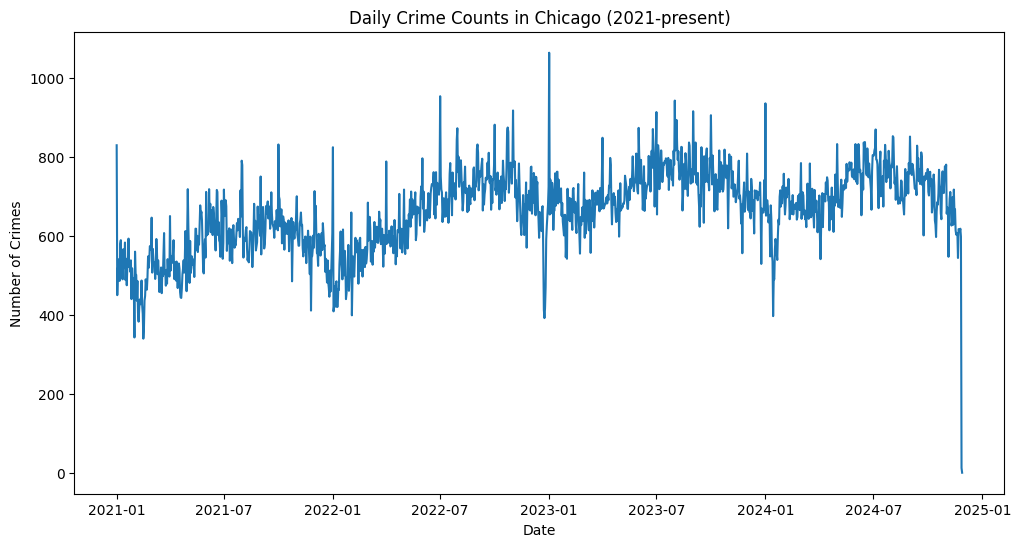

In [35]:
#plot daily crime counts
plt.figure(figsize=(12,6))
plt.plot(daily_crimes['Date'], daily_crimes['Count'])
plt.title('Daily Crime Counts in Chicago (2021-present)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

## Crime Type Distribution
### To understand the distribution of crime types

<Figure size 1200x600 with 0 Axes>

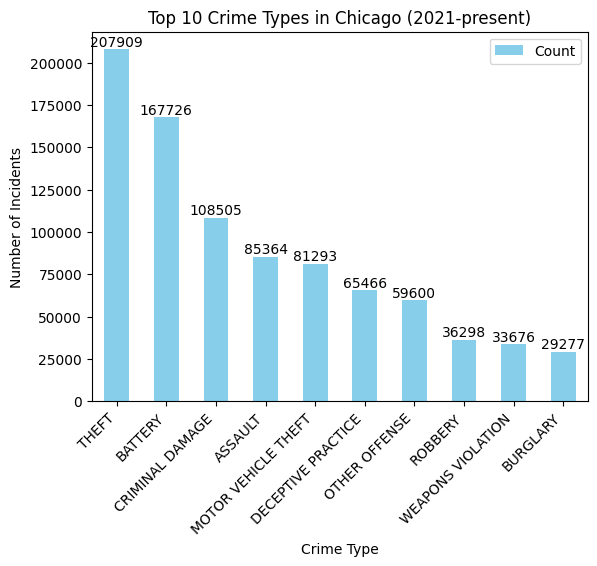

In [36]:
#Count crime type
crime_types = crime_data['Primary Type'].value_counts().reset_index(name='Count')

#Plot top 10 crime types
plt.figure(figsize=(12,6))
bars = crime_types[:10].plot(kind='bar', x='Primary Type', y='Count', color='skyblue')
# Add value labels inside the bars
plt.bar_label(bars.containers[0], label_type='edge', color='black')
plt.title('Top 10 Crime Types in Chicago (2021-present)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

## Spatial Analysis
### to analyze crime patterns across different neighborhoods

In [37]:
# Group by Community Area and count crimes
area_crimes = crime_data.groupby('Community Area').size().reset_index(name='Count')
area_crimes.head()

,Community Area,Count
0,1.0,16050
1,2.0,14409
2,3.0,15790
3,4.0,7791
4,5.0,5126


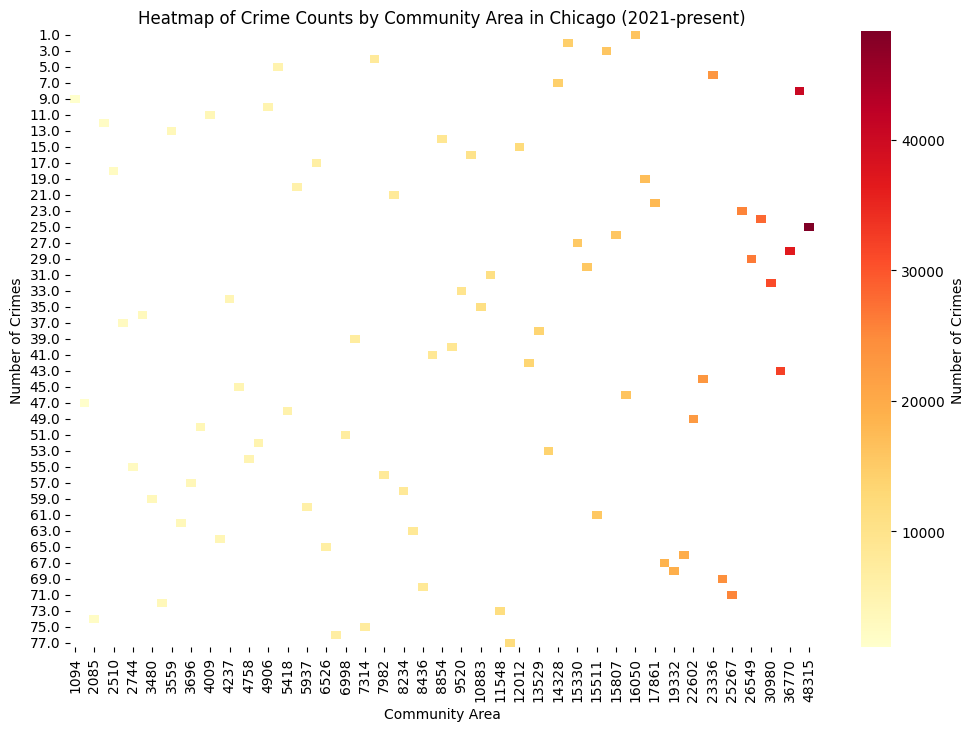

In [38]:
# Create a heatmap
pivot_data = area_crimes.pivot(index='Community Area', columns='Count', values='Count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_data, cmap='YlOrRd', cbar_kws={'label': 'Number of Crimes'})
plt.title('Heatmap of Crime Counts by Community Area in Chicago (2021-present)')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.show()

# Weather Data Analysis

## Temperature Trends
### To analyze temperature trends

In [39]:
import matplotlib.dates as mdates
from matplotlib.widgets import Cursor


# Load the weather data
weather_data = pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/weather_data.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data=weather_data.sort_values(by='date')
weather_data.head()



,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2021-01-01,-2.9,-7.1,1.7,9.7,30.0,36.0,19.1,1017.3
31,2021-01-02,-1.4,-5.5,0.6,0.0,360.0,337.0,18.0,1022.8
59,2021-01-03,0.3,-4.3,1.7,0.0,0.0,313.0,13.7,1023.7
90,2021-01-04,0.8,-4.3,4.4,0.0,0.0,15.0,18.7,1032.1
120,2021-01-05,13.3,5.6,29.4,0.0,0.0,202.0,27.7,1011.6


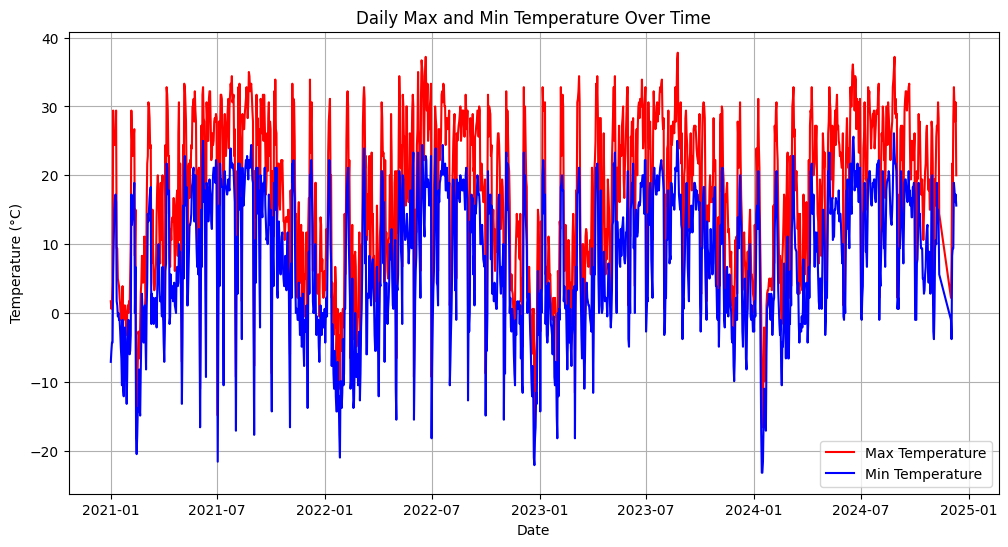

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(weather_data['date'], weather_data['tmax'], label='Max Temperature', color='red')
plt.plot(weather_data['date'], weather_data['tmin'], label='Min Temperature', color='blue')

plt.title('Daily Max and Min Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
print("daily_crimes columns:", daily_crimes.columns)
print("weather_data columns:", weather_data.columns)

daily_crimes columns: Index(['Date', 'Count'], dtype='object')
weather_data columns: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres'], dtype='object')


In [48]:
# Changing weather_data has 'date' instead of 'Date'
weather_data.rename(columns={'date': 'Date'}, inplace=True)

### Monthly Heatmap of Daily Temperature

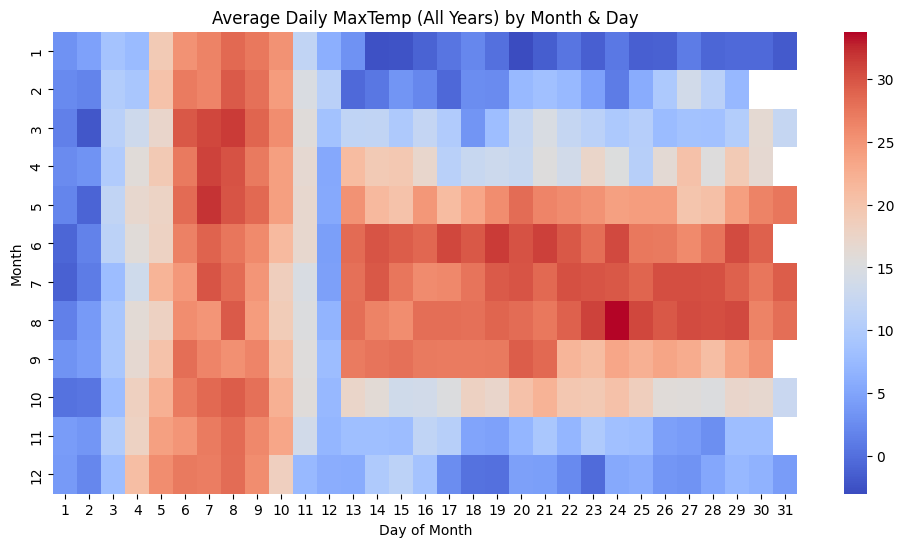

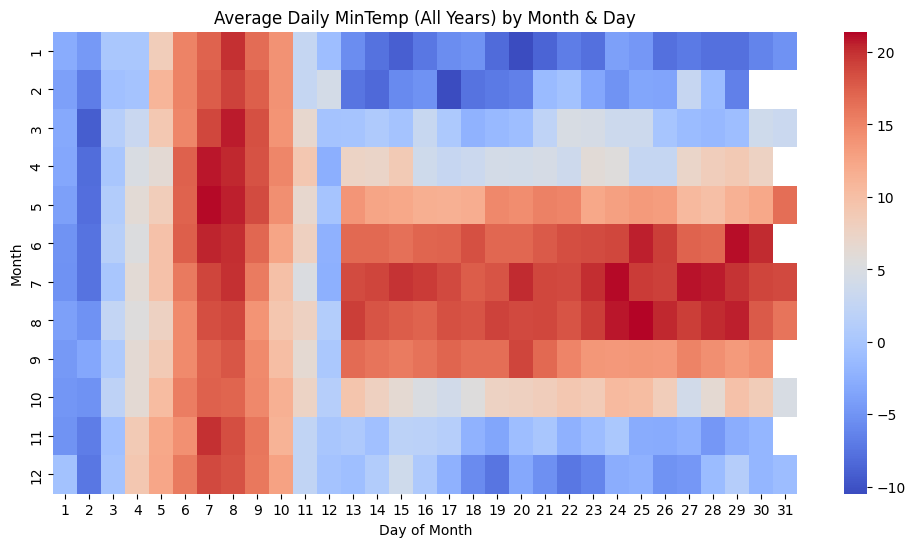

In [69]:
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

# 2) Pivot (average of MaxTemp across all years by Month & Day)
pivot_table = weather_data.pivot_table(
    index='Month',
    columns='Day',
    values='tmax',
    aggfunc='mean'
)

# 3) Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Average Daily MaxTemp (All Years) by Month & Day")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()


# 4) Pivot (average of MinTemp across all years by Month & Day)
pivot_table = weather_data.pivot_table(
    index='Month',
    columns='Day',
    values='tmin',
    aggfunc='mean'
)

# 5) Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Average Daily MinTemp (All Years) by Month & Day")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()

## Correlation Analysis
### To explore the relationship between weather and crime

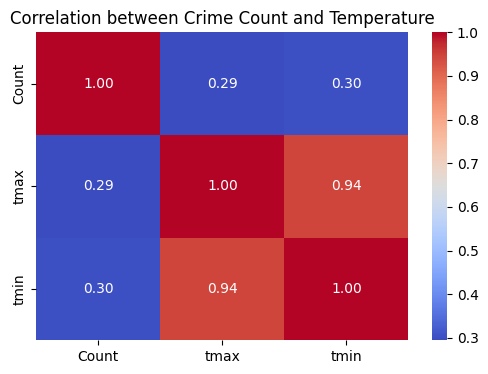

In [49]:
# Merge crime and weather data on date
merged_data = pd.merge(daily_crimes, weather_data, on='Date', how='inner')

# Calculate correlation
corr_columns = ['Count', 'tmax', 'tmin']
correlation = merged_data[corr_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Crime Count and Temperature')
plt.show()


### SCorrelation with Other Variables


Correlation Matrix with Additional Variables:
          Count      tmax      tmin      prcp      snow
Count  1.000000  0.294339  0.302326 -0.003520 -0.277557
tmax   0.294339  1.000000  0.944991  0.060932 -0.398515
tmin   0.302326  0.944991  1.000000  0.122095 -0.406972
prcp  -0.003520  0.060932  0.122095  1.000000 -0.034584
snow  -0.277557 -0.398515 -0.406972 -0.034584  1.000000


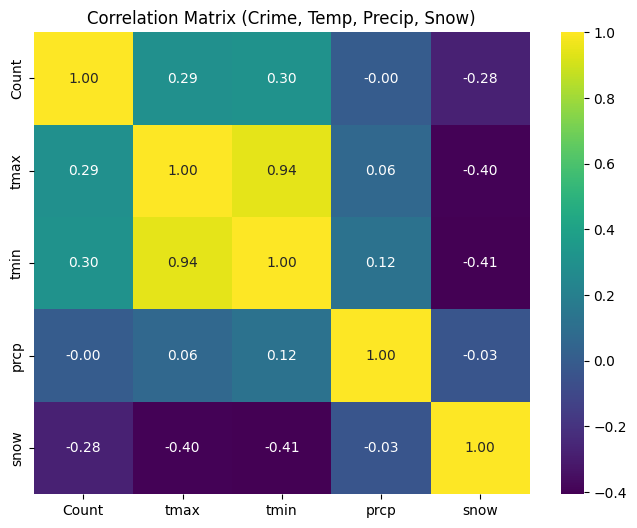

In [59]:
corr_columns = ['Count', 'tmax', 'tmin', 'prcp', 'snow']
corr_matrix = merged_data[corr_columns].corr()
print("Correlation Matrix with Additional Variables:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix (Crime, Temp, Precip, Snow)')
plt.show()

### Crime Rates in Each Season

In [60]:
crime_data['Month'] = crime_data['Date'].dt.month
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Other'  # for months 3,4,5,9,10,11

crime_data['Season'] = crime_data['Month'].apply(categorize_season)
season_counts = crime_data.groupby('Season').size().reset_index(name='CrimeCount')
print(season_counts)


   Season  CrimeCount
0   Other      485284
1  Summer      262830
2  Winter      198032


/var/folders/tl/sd9rwv413tq87083czy_yjjw0000gn/T/ipykernel_22673/2037945861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='Season', y='CrimeCount', palette='coolwarm')


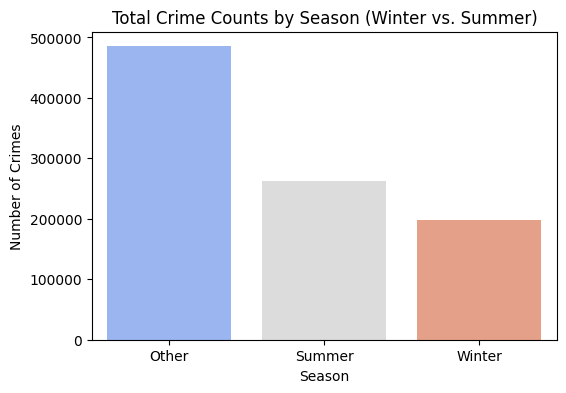

In [65]:
plt.figure(figsize=(6, 4))
sns.barplot(data=season_counts, x='Season', y='CrimeCount', palette='coolwarm')
plt.title("Total Crime Counts by Season (Winter vs. Summer)")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.show()